# I] Import functions and options

In [1]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt

In [2]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8), 'svg.fonttype' : 'none'})

In [3]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [4]:
path = input_file_directory + "mefs/glucose_lactate/"

# II] Glucose

In [5]:
%%time
# DL data ATG7 isoform expression
df_glu = pandas.read_csv(path+'glucose_exp2.csv', sep = ";")
print(df_glu)
df_glu = df_glu.T
df_glu.reset_index(inplace=True)
df_glu

   DMSO    WT   1,64650121  1,708473456
0  DMSO    EV  2,036298082  2,036298082
1  DMSO  iso1  1,290138313  1,288603043
2  DMSO  iso2  2,260724623  2,272345588
3   BAF    WT  1,636235222  1,691514548
4   BAF    EV  1,564893044  1,516080145
5   BAF  iso1  1,241719623  1,254805661
6   BAF  iso2  2,168122671          NaN
Wall time: 9.97 ms


,index,0,1,2,3,4,5,6
0,DMSO,DMSO,DMSO,DMSO,BAF,BAF,BAF,BAF
1,WT,EV,iso1,iso2,WT,EV,iso1,iso2
2,"1,64650121","2,036298082","1,290138313","2,260724623","1,636235222","1,564893044","1,241719623","2,168122671"
3,"1,708473456","2,036298082","1,288603043","2,272345588","1,691514548","1,516080145","1,254805661",NaN


In [6]:
df_glu.reset_index(inplace= True, drop=True)
df_glu_dmso = df_glu.iloc[:,:4]
df_glu_baf = df_glu.iloc[:,4:]

for df in df_glu_dmso, df_glu_baf:
    df.columns = df.iloc[1]

df_glu_dmso

1,WT,EV,iso1,iso2
0,DMSO,DMSO,DMSO,DMSO
1,WT,EV,iso1,iso2
2,"1,64650121","2,036298082","1,290138313","2,260724623"
3,"1,708473456","2,036298082","1,288603043","2,272345588"


In [7]:
df_glu_dmso = df_glu_dmso.drop(df.index[0:2])
df_glu_baf = df_glu_baf.drop(df.index[0:2])


   cells     value        x
0    WT  1.646501  Glucose
1    WT  1.708473  Glucose
2    EV  2.036298  Glucose
3    EV  2.036298  Glucose
4  iso1  1.290138  Glucose
5  iso1  1.288603  Glucose
6  iso2  2.260725  Glucose
7  iso2  2.272346  Glucose

   cells     value        x
0    WT  1.636235  Glucose
1    WT  1.691515  Glucose
2    EV  1.564893  Glucose
3    EV  1.516080  Glucose
4  iso1  1.241720  Glucose
5  iso1  1.254806  Glucose
6  iso2  2.168123  Glucose


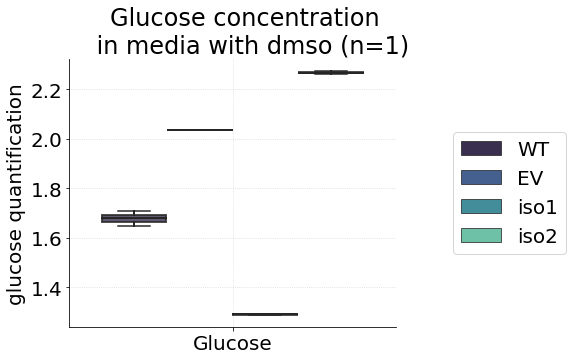

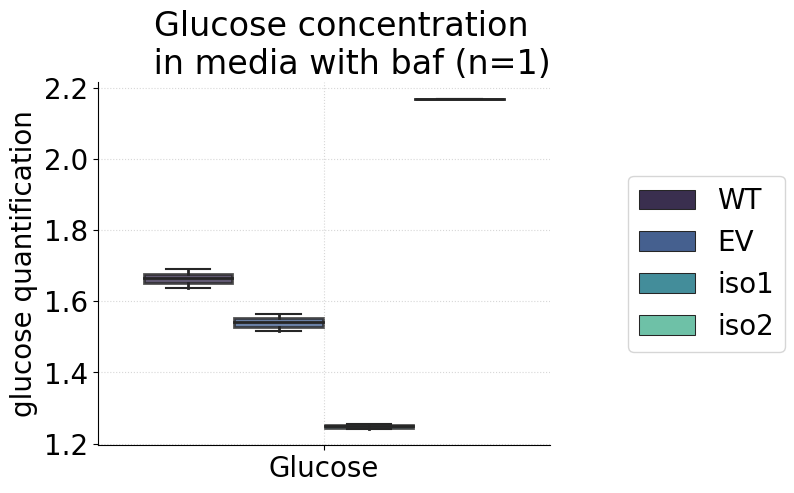

In [8]:
dfs = df_glu_dmso, df_glu_baf
infos = 'dmso', 'baf'

for i in range(len(dfs)) :
    df = dfs[i]
    info = infos[i]
    
    df = df.melt(var_name="cells") #convert wide to long df   
    df.dropna(axis=0, inplace = True) #drop Nan
    df.iloc[:,1:] = df.iloc[:,1:].apply(lambda x: x.str.replace(',','.')) #',' to '.'
    df['value'] = df['value'].astype(float)
    df['x'] = 'Glucose'
    print('\n', df)
    
    #graph
    seaborn.catplot(x="x", y="value", hue="cells", aspect= 1.2, kind="box", palette = 'mako',
                    data = df, boxprops={'lw':2, 'alpha' : 0.8}, medianprops={'lw':2}, whiskerprops={'lw':2}, 
                    showcaps=True, showfliers=False, legend=False)

    plt.tight_layout()
    plt.grid(alpha = 0.5, ls=':')
    plt.ylabel('glucose quantification')
    plt.xlabel('')
    plt.title('Glucose concentration \n in media with '+ info + ' (n=1)', x=.55)
    plt.legend(loc='center right', fontsize=20, bbox_to_anchor=(1.55, 0.5))  

# I] Lactate

In [13]:
%%time
# DL data ATG7 isoform expression
df_lact = pandas.read_csv(path+'lactate_exp2.csv', sep = ";")
print(df_lact)
df_lact = df_lact.T
df_lact.reset_index(inplace=True)
df_lact

   DMSO    WT  1,869402047  1,889384144
0  DMSO    EV   2,28700129  2,289585472
1  DMSO  iso1  1,476567498  1,452776711
2  DMSO  iso2  2,887694808  2,720433041
3   BAF    WT  1,937300488  1,898147776
4   BAF    EV  1,773681215  1,781394701
5   BAF  iso1  1,421837538  1,452103711
6   BAF  iso2  2,777117441  2,696993325
Wall time: 4.99 ms


,index,0,1,2,3,4,5,6
0,DMSO,DMSO,DMSO,DMSO,BAF,BAF,BAF,BAF
1,WT,EV,iso1,iso2,WT,EV,iso1,iso2
2,"1,869402047","2,28700129","1,476567498","2,887694808","1,937300488","1,773681215","1,421837538","2,777117441"
3,"1,889384144","2,289585472","1,452776711","2,720433041","1,898147776","1,781394701","1,452103711","2,696993325"


In [14]:
df_lact.reset_index(inplace= True, drop=True)
df_lact_dmso = df_lact.iloc[:,:4]
df_lact_baf = df_lact.iloc[:,4:]

for df in df_lact_dmso, df_lact_baf:
    df.columns = df.iloc[1]

df_lact_dmso

1,WT,EV,iso1,iso2
0,DMSO,DMSO,DMSO,DMSO
1,WT,EV,iso1,iso2
2,"1,869402047","2,28700129","1,476567498","2,887694808"
3,"1,889384144","2,289585472","1,452776711","2,720433041"


In [15]:
df_lact_dmso = df_lact_dmso.drop(df.index[0:2])
df_lact_baf = df_lact_baf.drop(df.index[0:2])


   cells     value        x
0    WT  1.869402  Lactate
1    WT  1.889384  Lactate
2    EV  2.287001  Lactate
3    EV  2.289585  Lactate
4  iso1  1.476567  Lactate
5  iso1  1.452777  Lactate
6  iso2  2.887695  Lactate
7  iso2  2.720433  Lactate

   cells     value        x
0    WT  1.937300  Lactate
1    WT  1.898148  Lactate
2    EV  1.773681  Lactate
3    EV  1.781395  Lactate
4  iso1  1.421838  Lactate
5  iso1  1.452104  Lactate
6  iso2  2.777117  Lactate
7  iso2  2.696993  Lactate


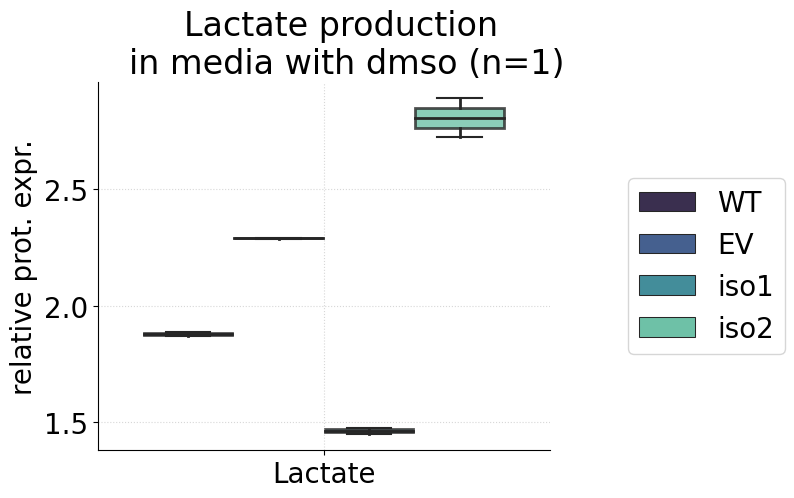

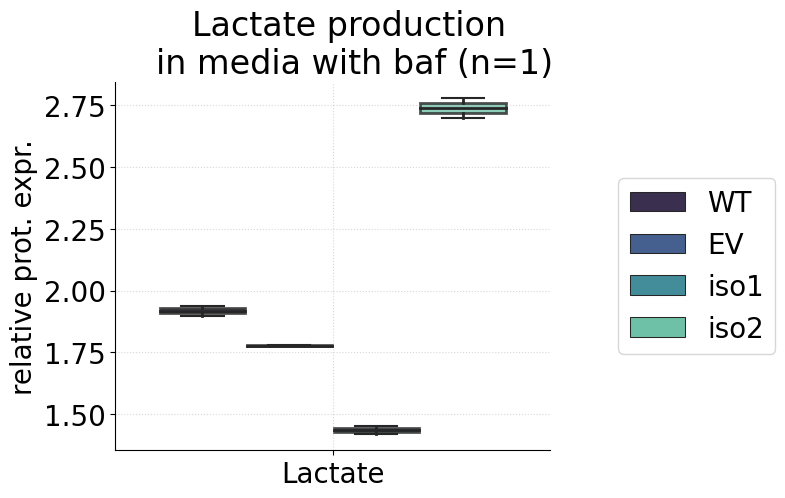

In [16]:
dfs = df_lact_dmso, df_lact_baf
infos = 'dmso', 'baf'

for i in range(len(dfs)) :
    df = dfs[i]
    info = infos[i]
    
    df = df.melt(var_name="cells") #convert wide to long df   
    df.dropna(axis=0, inplace = True) #drop Nan
    df.iloc[:,1:] = df.iloc[:,1:].apply(lambda x: x.str.replace(',','.')) #',' to '.'
    df['value'] = df['value'].astype(float)
    df['x'] = 'Lactate'
    print('\n', df)
    
    #graph
    seaborn.catplot(x="x", y="value", hue="cells", aspect= 1.2, kind="box", palette = 'mako',
                    data = df, boxprops={'lw':2, 'alpha' : 0.8}, medianprops={'lw':2}, whiskerprops={'lw':2}, 
                    showcaps=True, showfliers=False, legend=False)

    plt.tight_layout()
    plt.grid(alpha = 0.5, ls=':')
    plt.ylabel('relative prot. expr.')
    plt.xlabel('')
    plt.title('Lactate production \nin media with '+ info + ' (n=1)', x=.55)
    plt.legend(loc='center right', fontsize=20, bbox_to_anchor=(1.55, 0.5))  